In [1]:
%%capture

from siphon.catalog import TDSCatalog 
import numpy as np
import xarray as xr
import pandas as pd
import scipy
import gdal
from scipy.ndimage.filters import uniform_filter
from scipy import ndimage
from scipy.ndimage.filters import *
import os
import math
from osgeo import osr
from fractions import Fraction
import timeit
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
%matplotlib inline
import random
# import plotting tools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib as mpl


In [2]:
location = (r'D:/PhD/junk')
os.chdir(location)
DEM = 'D:/PhD/junk/hypsometry.nc'
#url = 'http://dapds00.nci.org.au/thredds/dodsC/ub8/au/treecover/250m/ANUWALD.TreeCover.2014.250m.nc'
data = xr.open_dataset(DEM)
data

<xarray.Dataset>
Dimensions:     (latitude: 6800, longitude: 8400, z: 20)
Coordinates:
  * latitude    (latitude) float32 -10.0025 -10.0075 ... -43.9925 -43.9975
  * longitude   (longitude) float32 112.003 112.007 112.012 ... 153.992 153.997
Dimensions without coordinates: z
Data variables:
    hypsometry  (z, longitude, latitude) float32 ...
    percentile  (z) float32 ...
Attributes:
    derivation:     Derived from 1-sec SRTM DEM
    creator_name:   Water and Landscape Dynamics group
    creator_url:    http://www.wenfo.org/wald/
    creator_email:  albert.vandijk@anu.edu.au
    institution:    Australian National University
    date_created:   01-Jan-2019
    license:        Creative Commons with Attribution (https://creativecommon...

In [3]:
list(data.variables.keys())

['hypsometry', 'percentile', 'latitude', 'longitude']

In [18]:
DEM_data = data.hypsometry.sel(z = 0)
#goodnight = trees.sel(latitude=slice(-25.15, -25.40), longitude=slice(151.80, 152.05))
#study_site = goodnight.transpose('latitude', 'longitude')
#study_site_n = np.array(study_site)


In [29]:
one_km = np.transpose(scipy.ndimage.zoom(DEM_data, 0.5, order = 1))

In [33]:
five_km = scipy.ndimage.zoom(one_km, 0.2, order = 1)

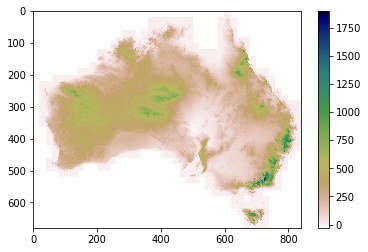

In [34]:
plt.imshow(five_km, cmap="gist_earth_r")
plt.colorbar()

In [126]:
data.latitude

<xarray.DataArray 'latitude' (latitude: 14000)>
array([ -9.00125,  -9.00375,  -9.00625, ..., -43.99375, -43.99625, -43.99875],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -9.00125 -9.00375 -9.00625 -9.00875 ...
Attributes:
    long_name:  latitude
    units:      degrees_north

In [27]:
def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

def main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    reversed_arr = array[::-1] # reverse array so the tif looks like the array
    array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr) # convert array to raster


if __name__ == "__main__":
    rasterOrigin = (151.80,-25.40)
    pixelWidth = 0.0025
    pixelHeight = 0.0025
    newRasterfn = 'new_test.tif'
    array = study_site_n
    main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array)